# Explore here

## Librerias a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats

## Paso 1. Planteamiento del problema y recopilación de datos

La importante compañía de seguros 4Geeks Insurance S.L. quiere calcular, en función de datos fisiológicos de sus clientes, cuál va a ser la prima (coste) que debe asumir cada uno de ellos. Para ello, ha reunido a un equipo completo de médicos y en función de datos de otras compañías y un estudio particular han logrado reunir un conjunto de datos para entrenar un modelo predictivo.

In [2]:
data_i=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

In [3]:
data_i.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data_i.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data_i.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
data_i.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

## Paso 2. Exploracion y limpieza de datos

- El Dataset esta conformado por 1337 valores, 7 variables, incluyendo la clase a predecir (charges), las predictoras estan conformadas por: age, sex, bmi, children, smoker, region. No presenta valores nulos, solo tiene un registro duplicado, el cual fue eliminado. Solo queda por revisar que variables conformaran el analisis y revisar la presencia de valores atipicos.

- La distribucion de los tipos de variables es la siguiente:
    - age       int64  
    - sex       object 
    - bmi       float64
    - children  int64  
    - smoker    object 
    - region    object 
    - charges   float64

- Se van a excluir del Dataset para el analisis las variables region y children, considero que no tienen un peso importante en la clase a predecir. Por ejemplo, una simple exploracion de la variable **charges Vs children**, muestra como los valores promedios de la variable charges son muy parecidos indistintamente de la cantidad de hijos, lo cual denota una baja correlacion de la variables. Analisis similar puede hacerse con la **variable region**.

<Axes: ylabel='charges'>

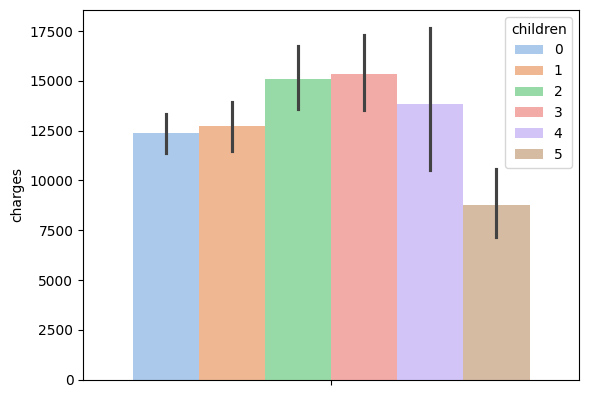

In [8]:
sns.barplot(data=data_i,y='charges',hue='children',palette='pastel')

In [9]:
data_i.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
dp=data_i[data_i.duplicated(keep=False)]
data_i.drop_duplicates(inplace=True)

In [11]:
data_i.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
data_i.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


### DataSet Seleccionado para realizar los analisis

In [13]:
data_i.drop(axis=1,columns=['region','children'],inplace=True)
data_i.columns

Index(['age', 'sex', 'bmi', 'smoker', 'charges'], dtype='object')

In [14]:
data_i.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1337 non-null   int64  
 1   sex      1337 non-null   object 
 2   bmi      1337 non-null   float64
 3   smoker   1337 non-null   object 
 4   charges  1337 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 62.7+ KB


## Paso 3. Análisis de variables univariante

### Análisis sobre variables categóricas y numericas

A continuacion se muestran histogramas para las variables: host_name, neighbourhood_group, neighbourhood y room_type.

el analisis de los histogramas por cada variable arroja la siguiente informacion:

- <span style="color: magenta;">sex:</span> sex es una variable con las clases balanceadas (femenino 662 valores y masculino 675 valores).
- <span style="color: magenta;">smoker:</span> smoker tiene un 20,5% en la clase 'yes' y un 79,5% en la clase 'no'.
- <span style="color: magenta;">age:</span> El 75% de los valores de age estan entre 18 y 51 años, no parecen haber valores atipicos.  
- <span style="color: magenta;">bmi:</span> El indice de masa corporal tiene una media, moda y mediana muy parecidas, aldedor del valor de 30, lo que conlleva a pensar que los datos pudiesen tener una distribucion normal, lo mismo puede apreciarse en un grafico Q-Q Plot. Deben revisarse valores atipicos.
- <span style="color: magenta;">charges:</span>La variable clase charges, tiene un sesgo positivo (mediana < media), deben revisarse valores atipicos, el 75% de los datos se ubican entre 1121.8 y 16657.7; sin embargo, se tienen valores con magnitudes superiores a los 60.000.


### Graficos Variables Categoricas y Numericas

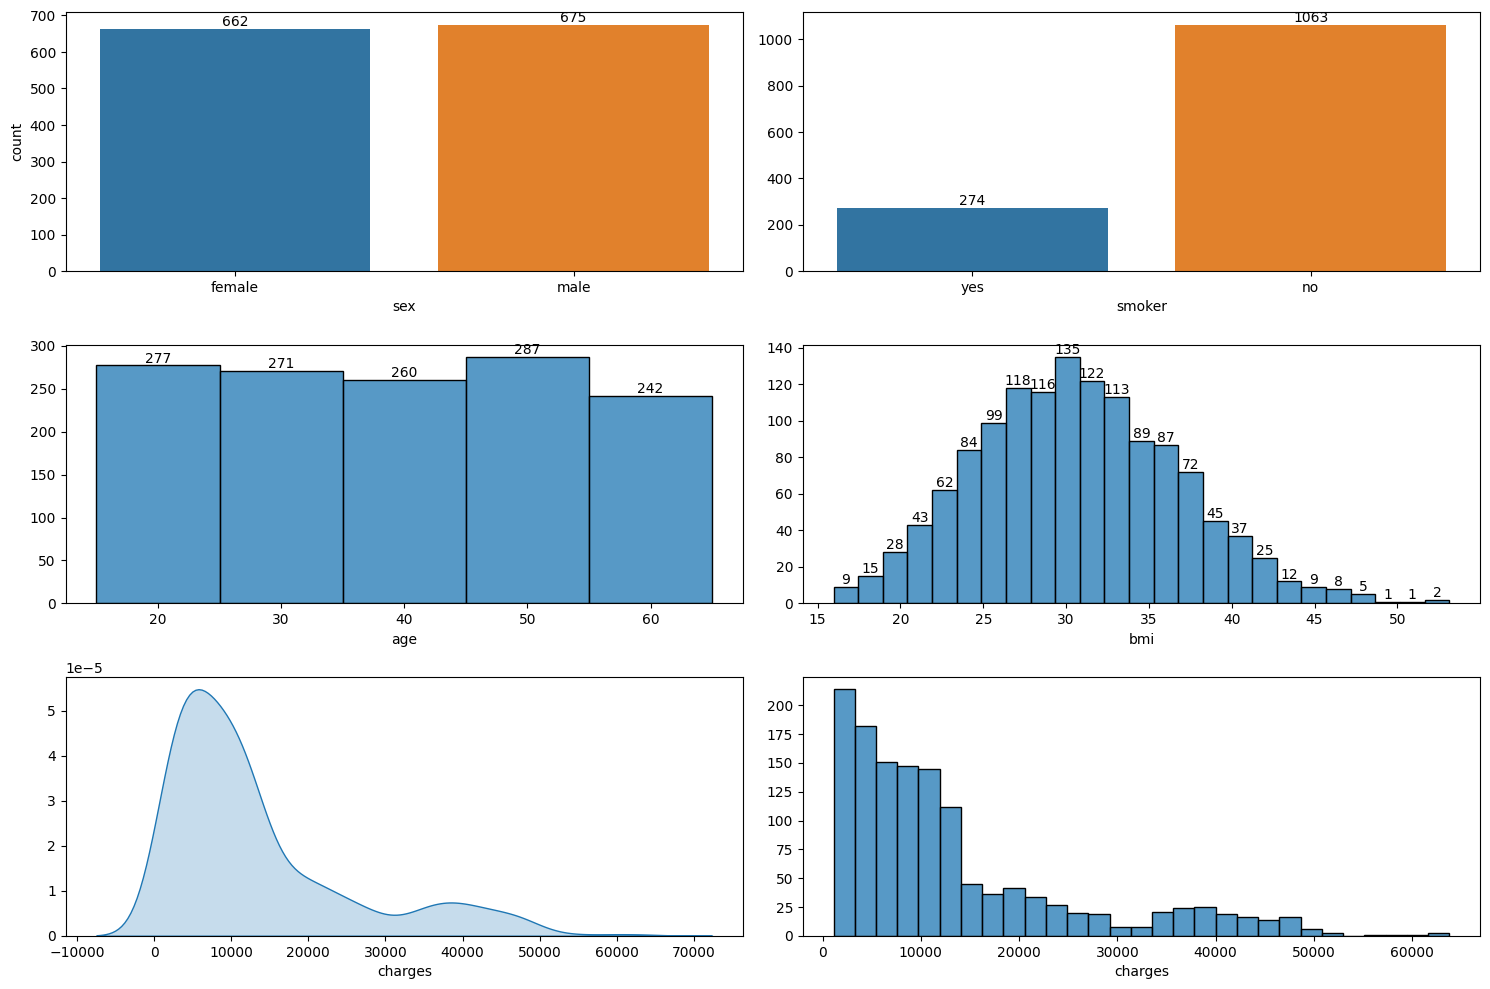

In [15]:
fig, axis = plt.subplots(3,2, figsize = (15, 10))

# Crear un histograma múltiple
sns.countplot(ax = axis[0,0], data = data_i, x = "sex", hue='sex')
axis[0,0].bar_label(axis[0,0].containers[0])
axis[0,0].bar_label(axis[0,0].containers[1])

sns.countplot(ax = axis[0,1], data = data_i, x = "smoker", hue='smoker').set(ylabel = None)
axis[0,1].bar_label(axis[0,1].containers[0])
axis[0,1].bar_label(axis[0,1].containers[1])

sns.histplot(ax = axis[1,0], data = data_i, x = "age", bins=(15,25,35,45,55,65)).set(ylabel = None)
axis[1,0].bar_label(axis[1,0].containers[0])
#axis[1,0].bar_label(axis[1,0].containers[1])

sns.histplot(ax = axis[1,1], data = data_i, x = "bmi").set(ylabel = None)
axis[1,1].bar_label(axis[1,1].containers[0])

sns.kdeplot(ax = axis[2,0], data = data_i.charges,fill=True).set(ylabel = None)
#axis[2,0].bar_label(axis[2,0].containers[0])

sns.histplot(ax = axis[2,1], data = data_i, x='charges').set(ylabel = None)
#axis[2,0].bar_label(axis[2,0].containers[0])


#sns.kdeplot(data=iris_data['Petal Length (cm)'],fill=True)
# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [16]:
data_i.charges.describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [17]:
data_i.charges.mode()

0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1332    55135.40209
1333    58571.07448
1334    60021.39897
1335    62592.87309
1336    63770.42801
Name: charges, Length: 1337, dtype: float64

In [18]:
data_i.age.describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [19]:
data_i.bmi.describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [20]:
data_i.bmi.mode()

0    32.3
Name: bmi, dtype: float64

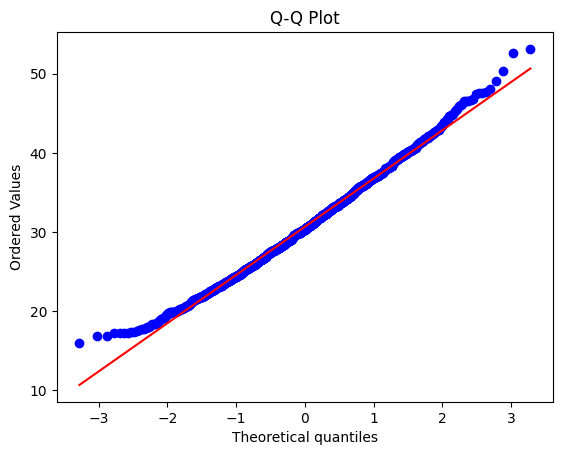

In [21]:
stats.probplot(data_i.bmi, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

## Paso 4. Análisis de variables multivariante

Se va a comparar la variable objetivo **'charges'** con las variables numericas y categoricas predictoras: age, bmi, sex y smoker. Se procedera a factorizar las variables categoricas para poder determinar su correlacion con la variable clase.

**Principales conclusiones:**
- En los graficos tipo barplot que se hicieron se observa como las variables **(age, bmi y smoker)** estan relacionadas con el valor de la prima, en relacion al sexo, se observa una cierta correlacion, se debe completar el analisis con la matriz de correlaciones. En el grafico de charges Vs bmi en el rango de 50 - 60, se observo un valor promedio de la prima para los unicos tres valores del rango, muy elevado, dado que se tiene un monto de 44501, se deben revisar los atipicos para la variable clase; sin embargo, esta persona es fumadora, pero tiene 22 años y es de sexo masculino, todo apunta a un valor atipico. 

- La variable que mas se relaciona con la **clase charges**, es **smoker**, con una correlacion inversa (negativa) de -0.79, bastante alta. En relacion a las otras variables, en orden de importancia siguen age y bmi, con valores medios de 0.30 y 0.20, respectivamente. La variable sexo muestra una correlacion baja de 0.06 con la clase a predecir, por lo cual, he decidido eliminarla del analisis.

In [22]:
data_i['age_range']=pd.cut(data_i['age'],bins=[0,20,30,40,50,60,70],
                labels=['18-20 a','20-30 a','30-40 a','40-50 a','50-60 a','60-70 a'],include_lowest=True)

In [23]:
data_i['bmi_range']=pd.cut(data_i['bmi'],bins=[0,20,30,40,50,60],
                labels=['15-20','20-30','30-40','40-50','50-60'],include_lowest=True)

In [24]:
data_i.loc[data_i.bmi>50]

,age,sex,bmi,smoker,charges,age_range,bmi_range
847,23,male,50.38,no,2438.0552,20-30 a,50-60
1047,22,male,52.58,yes,44501.3982,20-30 a,50-60
1317,18,male,53.13,no,1163.4627,18-20 a,50-60


In [25]:
data_i.loc[data_i.age==61]

,age,sex,bmi,smoker,charges,age_range,bmi_range
66,61,female,39.100,no,14235.07200,60-70 a,30-40
103,61,female,29.920,yes,30942.19180,60-70 a,20-30
131,61,female,22.040,no,13616.35860,60-70 a,20-30
190,61,male,31.570,no,12557.60530,60-70 a,30-40
330,61,female,36.385,yes,48517.56315,60-70 a,30-40
332,61,female,31.160,no,13429.03540,60-70 a,30-40
370,61,female,21.090,no,13415.03810,60-70 a,20-30
421,61,male,35.860,yes,46599.10840,60-70 a,30-40
475,61,male,28.310,yes,28868.66390,60-70 a,20-30
491,61,female,25.080,no,24513.09126,60-70 a,20-30


### Graficos Variable Clase Versus Predictoras

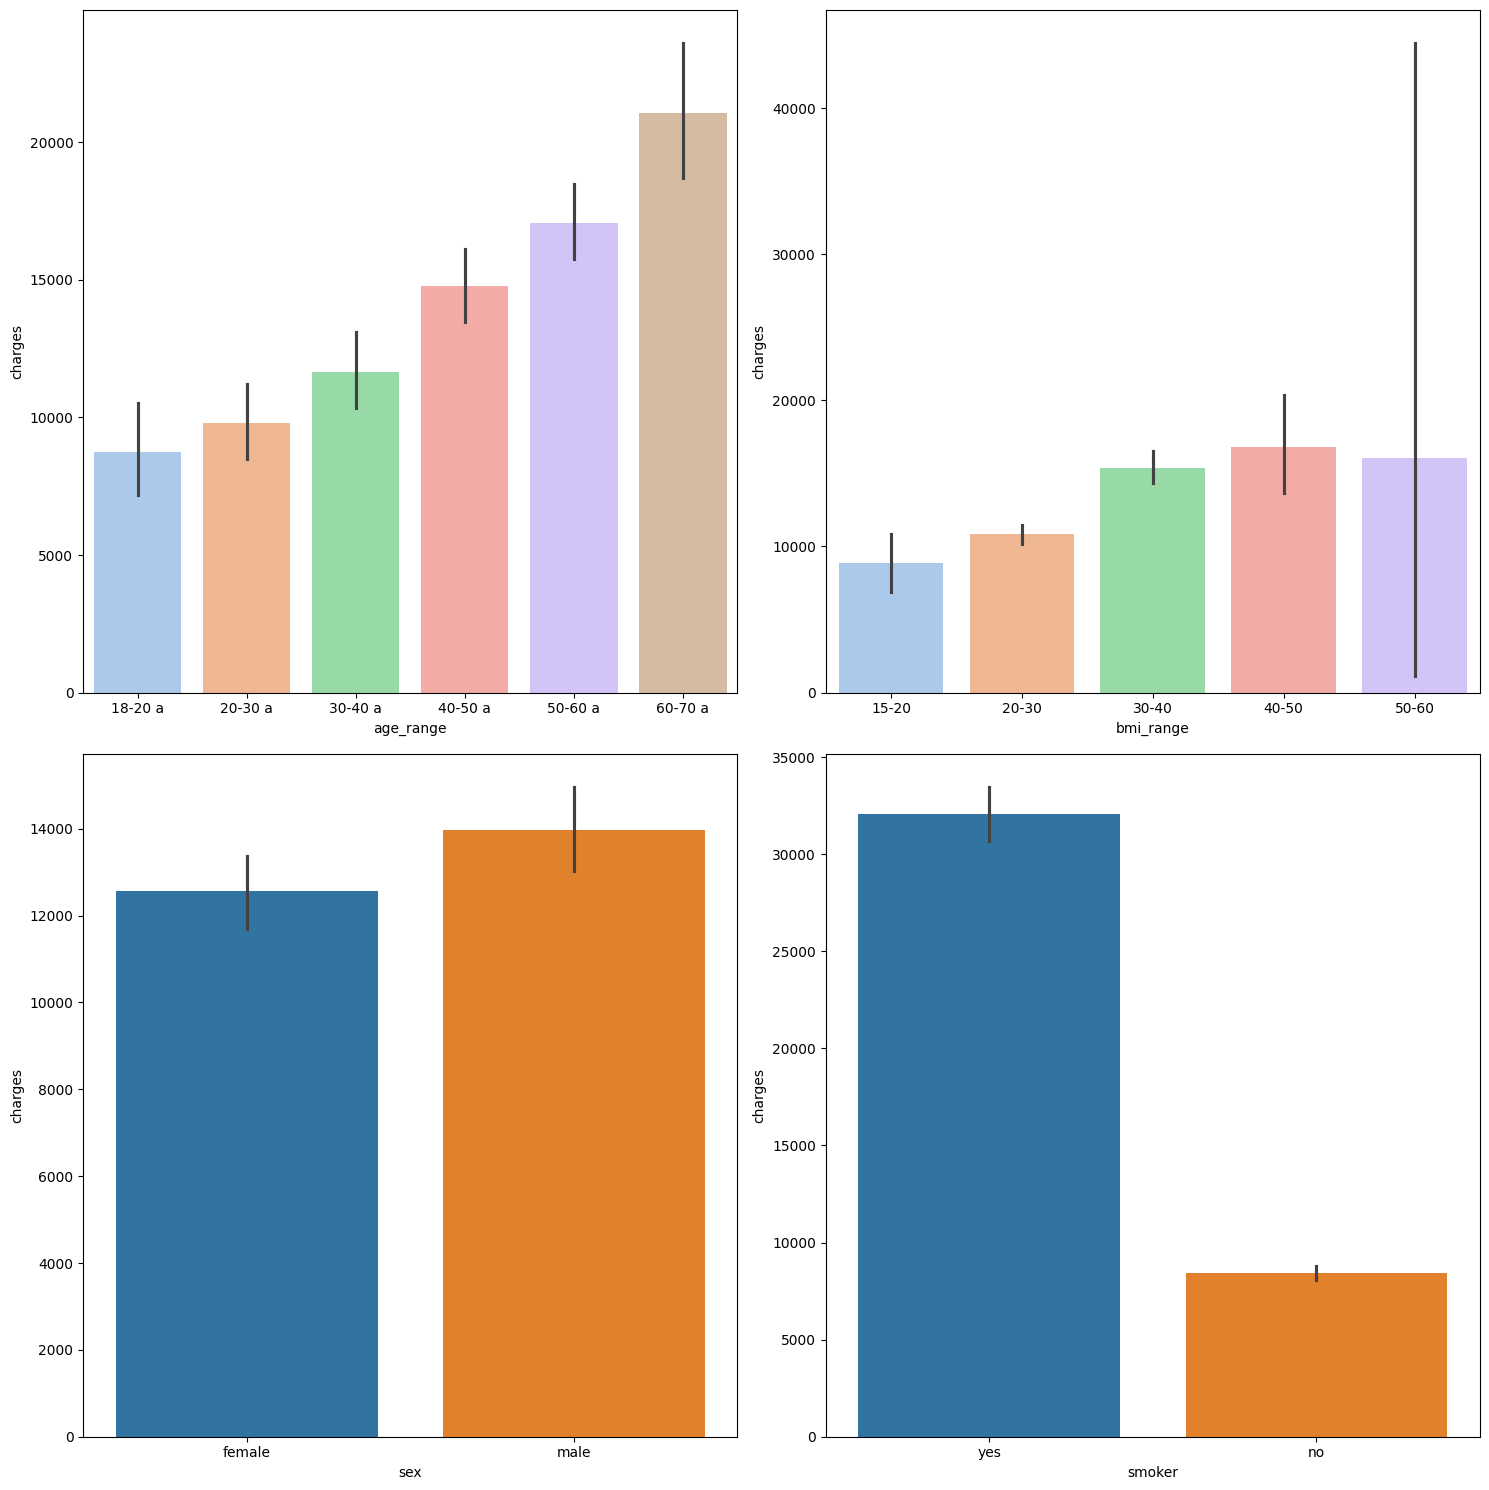

In [26]:
fig, axis = plt.subplots(2,2, figsize = (15, 15))

sns.barplot(ax = axis[0, 0], data = data_i, y ='charges',x='age_range', hue = 'age_range',palette='pastel')
sns.barplot(ax = axis[0, 1], data = data_i, y = 'charges',x='bmi_range', hue = "bmi_range",palette='pastel')

sns.barplot(ax = axis[1, 0],data=data_i,y='charges',x='sex', hue='sex' )
sns.barplot(ax = axis[1,1],data=data_i,y = 'charges',x='smoker',hue='smoker' )


plt.tight_layout()
#fig.delaxes(axis[2,1])
#fig.delaxes(axis[2,2])

plt.show()

### Factorizacion de Variables Categoricas

In [27]:
data_i['sex_f']=pd.factorize(data_i['sex'])[0]
data_i['smoker_f']=pd.factorize(data_i['smoker'])[0]


In [28]:
data_i.columns

Index(['age', 'sex', 'bmi', 'smoker', 'charges', 'age_range', 'bmi_range',
       'sex_f', 'smoker_f'],
      dtype='object')

### Matriz de Correlacion

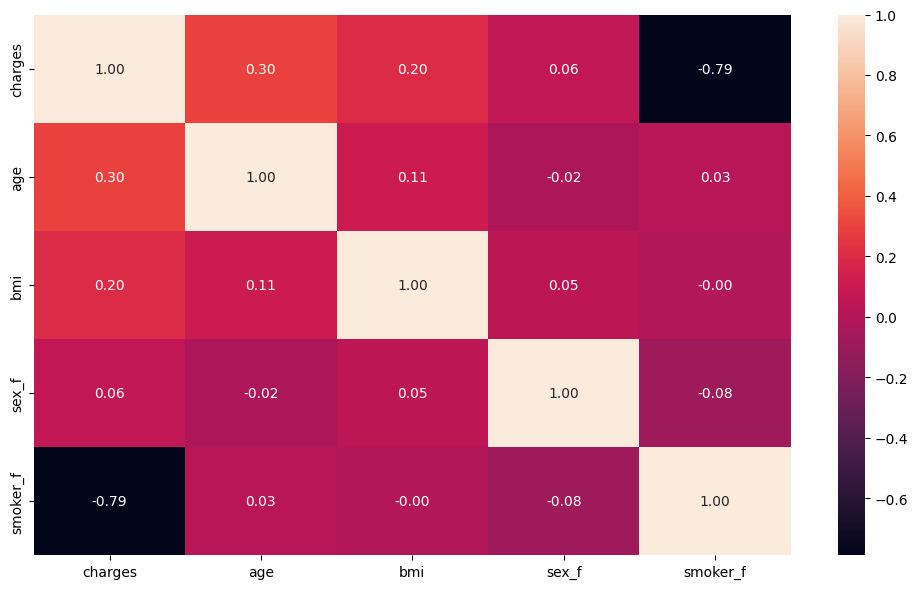

In [29]:
fig, axis = plt.subplots(figsize = (10, 6))
matriz_corr=data_i[['charges','age','bmi','sex_f','smoker_f']].corr()
#print(matriz_corr)
sns.heatmap(matriz_corr, annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

## Paso 5. Ingenieria de Características

Se estaran revisando valores atipicos para las variables charges, age y bmi. La variable clase es la que presenta mas valores atipicos de acuerdo a los boxplots realizados. La variable age no posee outliers. 

- La variable charges tiene como limite superior para determinar los valores outliers, un valor de 34524.78, de acuerdo a este parametro se tendrian que eliminar 132 datos, de los cuales, 129 pertenecen a personas que son fumadores, dado la relacion que existe entre las variables charges y smoker, estos valores pueden ser ajustados a la realidad, por lo cual, no voy a eliminar ninguno.

- Para bmi no se eliminaran datos, solo existen 8 valores por encima del limite superior.


### Graficos BoxPlots 

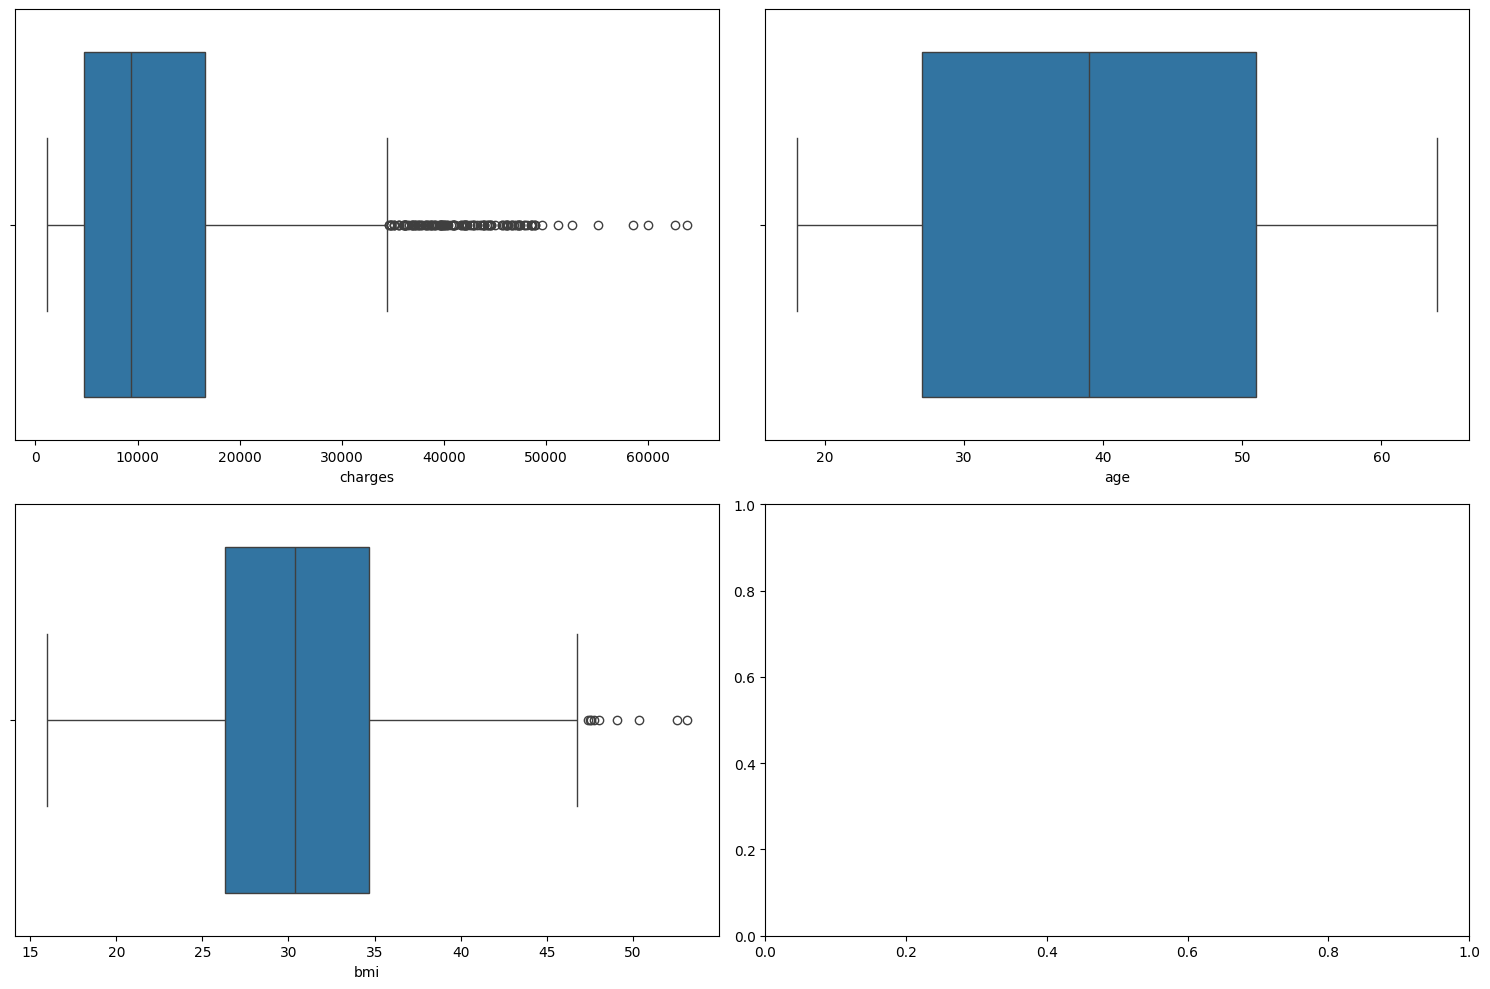

In [30]:
fig, axis = plt.subplots(2,2, figsize = (15, 10))

# Crear un histograma múltiple
sns.boxplot(ax = axis[0,0], data = data_i, x = "charges")
sns.boxplot(ax = axis[0,1], data = data_i, x = "age")
sns.boxplot(ax = axis[1,0], data = data_i, x = "bmi")

# Ajustar el layout
plt.tight_layout()
# Mostrar el plot
plt.show()



In [31]:
d_charges=data_i['charges'].describe()
charges_iqr=d_charges['75%']-d_charges['25%']
p_lim_sup=d_charges['75%']+1.5*charges_iqr
p_lim_inf=d_charges['25%']-1.5*charges_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(p_lim_sup, 2)} y {round(p_lim_inf, 2)}, con un rango intercuartílico de {round(charges_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 34524.78 y -13120.72, con un rango intercuartílico de 11911.37


In [32]:
#data_i=data_i[data_i.charges<=50000]

In [33]:
d_bmi=data_i['bmi'].describe()
bmi_iqr=d_bmi['75%']-d_bmi['25%']
p_lim_sup=d_bmi['75%']+1.5*bmi_iqr
p_lim_inf=d_bmi['25%']-1.5*bmi_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(p_lim_sup, 2)} y {round(p_lim_inf, 2)}, con un rango intercuartílico de {round(bmi_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 47.32 y 13.67, con un rango intercuartílico de 8.41


In [34]:
data_i.loc[data_i.bmi>47.17]

,age,sex,bmi,smoker,charges,age_range,bmi_range,sex_f,smoker_f
116,58,male,49.06,no,11381.32540,50-60 a,40-50,1,1
286,46,female,48.07,no,9432.92530,40-50 a,40-50,0,1
401,47,male,47.52,no,8083.91980,40-50 a,40-50,1,1
543,54,female,47.41,yes,63770.42801,50-60 a,40-50,0,0
847,23,male,50.38,no,2438.05520,20-30 a,50-60,1,1
860,37,female,47.60,yes,46113.51100,30-40 a,40-50,0,0
1047,22,male,52.58,yes,44501.39820,20-30 a,50-60,1,0
1088,52,male,47.74,no,9748.91060,50-60 a,40-50,1,1
1317,18,male,53.13,no,1163.46270,18-20 a,50-60,1,1


In [35]:
data_i.loc[data_i.charges>34525]['smoker'].value_counts()

smoker
yes    136
no       3
Name: count, dtype: int64

### Split Data Train y Test

In [36]:
from sklearn.model_selection import train_test_split

num_variables = ['age','bmi','smoker_f']

# Dividimos el conjunto de datos en muestras de train y test
X = data_i.drop("charges", axis = 1)[num_variables]
y = data_i["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,bmi,smoker_f
1114,23,24.510,1
968,21,25.745,1
599,52,37.525,1
170,63,41.470,1
275,47,26.600,1


### Escalado de Data Train y Test

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,age,bmi,smoker_f
1114,0.108696,0.230024,1.0
968,0.065217,0.263250,1.0
599,0.739130,0.580172,1.0
170,0.978261,0.686306,1.0
275,0.630435,0.286252,1.0


## Paso 5. Inicialización y entrenamiento del modelo

In [38]:
model = LinearRegression()
model.fit(X_train_scal, y_train)

LinearRegression()

In [39]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2, b3): {model.coef_}")

Intercepto (a): 21701.79391257017
Coeficientes (b1, b2, b3): [ 11586.30415359  11329.51105637 -23074.26173498]


## Paso 6: Predicción del modelo

In [40]:
y_pred = model.predict(X_test_scal)
y_pred

array([ 8433.67443577,  4336.46678013, 13165.0382606 , 30593.69534864,
        8738.64384303, 13004.1887831 , 29273.63576136,  2177.09021482,
       10922.95093736, 10315.83022735, 11021.84491859, 33740.33309282,
       30613.92158231, 18004.87150727,  9656.23179762,  9311.37354392,
        4325.12010919, 32099.96630635,  3001.71338943,  5552.62898392,
        4325.12010919, 29913.00795743, 14580.01800456, 30752.45719245,
       31444.92261851,  4769.02189756, 35187.05259131, 37413.46842278,
       10952.8675722 , 12177.75978526,  6505.9651105 , 13121.95183512,
         870.87899962, 12471.87695664, 40355.37672202, 12499.04467281,
        2732.11267963,  2866.20850841, 32023.18474965,  9365.1280589 ,
        6903.0538664 , 29243.81679061, 34097.79751626, 11919.91981386,
        6896.22734444,  4145.55111435,  6040.33037213,  9173.38425823,
        4186.69945959,  8909.59778913,  6340.1295272 , 12053.6361681 ,
       30836.41015271,  4425.70495311, 10719.84316929,  9666.05445578,
      

In [41]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 35841574.81814755
Coeficiente de determinación: 0.8049502474643171


### Respaldo Data Procesada

In [48]:
X_train_scal.to_csv('C:/Users/gfern/OneDrive/Escritorio/4GeeksAcademy/ML-Linear-Regression/data/processed/X_train.csv')
X_test_scal.to_csv('C:/Users/gfern/OneDrive/Escritorio/4GeeksAcademy/ML-Linear-Regression/data/processed/X_test.csv')
y_train.to_csv('C:/Users/gfern/OneDrive/Escritorio/4GeeksAcademy/ML-Linear-Regression/data/processed/y_train.csv')
y_test.to_csv('C:/Users/gfern/OneDrive/Escritorio/4GeeksAcademy/ML-Linear-Regression/data/processed/y_test.csv')              
